# Dummy dataset

Find this notebook at `EpyNN/nnlive/dummy_time/prepare_dataset.ipynb`. 
Regular python code at `EpyNN/nnlive/dummy_time/prepare_dataset.py`.

This notebook is the third of the series on preparing data for Neural Network regression with EpyNN.

In addition to the topic-specific content, it contains several explanations about basics or general concepts in programming that are important in the context.

Note that elements developed in [dummy dataset with Boolean](../dummy_boolean/prepare_dataset.ipynb) and [dummy dataset with string](../dummy_string/prepare_dataset.ipynb) may not be recalled herein.

## What is a time series?

Time series is not a data-type. It represents sequential data with respect to the time dimension. Herein, we will work with **sequential** data containing **numerical** elements of data-type **float**.

## Why preparing a dummy dataset with time features?

The general interest of dummy dataset is explained in [dummy dataset with boolean sample features](../dummy_boolean/prepare_dataset.ipynb#Why-preparing-a-dummy-dataset-with-Boolean-features).

## Prepare a set of time sample features and related label

### Imports

In [1]:
# EpyNN/nnlive/dummy_time/prepare_dataset.ipynb
# Standard library imports
import random

# Related third party imports
import matplotlib.pyplot as plt
import numpy as np

### Seeding

In [2]:
random.seed(1)

### Generate features

We need to define a function which will generate pseudo-random time features.

In [13]:
def features_time(TIME=1, SAMPLING_RATE=128):
    """Generate dummy time features.

    Time features may be white noise or a sum with a pure sine-wave.

    The pure sin-wave has random frequency lower than SAMPLING_RATE // 4.

    :param SAMPLING_RATE: Sampling rate (Hz), defaults to 128.
    :type SAMPLING_RATE: int

    :param TIME: Sampling time (s), defaults to 1.
    :type TIME: int

    :return: Time features of shape (N_FEATURES,).
    :rtype: :class:`numpy.ndarray`

    :return: White noise of shape (N_FEATURES,).
    :rtype: :class:`numpy.ndarray`
    """
    # Number of features describing a sample
    N_FEATURES = TIME * SAMPLING_RATE

    # Initialize features array
    features = np.linspace(0, TIME, N_FEATURES, endpoint=False)

    # Random choice of true signal frequency
    signal_frequency = random.uniform(0, SAMPLING_RATE // 4)

    # Generate pure sine wave of N_FEATURES points
    features = np.sin(2 * np.pi * signal_frequency * features)

    # Generate white noise
    white_noise = np.random.normal(0, scale=0.5, size=N_FEATURES)

    # Random choice between noisy signal or white noise
    features = random.choice([features + white_noise, white_noise])

    return features, white_noise

The code is commented and quite self-explaining, let's proceed with a call.

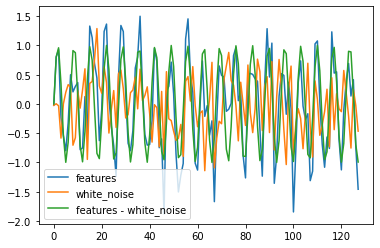

In [14]:
features, white_noise = features_time()

plt.plot(features, label="features")
plt.plot(white_noise, label="white_noise")
plt.plot(features - white_noise, label="features - white_noise")
plt.legend()
plt.show()

Here we have got noisy features from the random choice because when subtracting white_noise from features we recover a pure sine-wave of random frequency, as stated in the comment of the features_time() function.

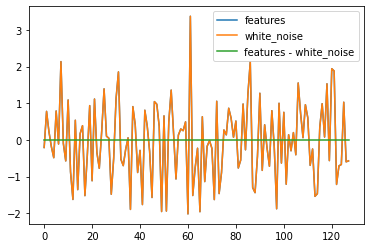

In [5]:
features, white_noise = features_time()

plt.plot(features, label="features")
plt.plot(white_noise, label="white_noise")
plt.plot(features - white_noise, label="features - white_noise")
plt.legend()
plt.show()

By contrast, here we retrieved features which only contain white_noise, since the subtract operation return a flat line.

Therefore, sample features may consist of noise containing a true signal, or just pure noise.

### Generate label

As already mentioned, in this dummy example we have the *a priori* knowledge of the law we want to model.


In [6]:
def label_features(features, white_noise):
    """Prepare label associated with features.

    The dummy law is:

    True signal in features = positive.
    No true signal in features = negative.

    :return: Time features of shape (N_FEATURES,).
    :rtype: :class:`numpy.ndarray`

    :return: White noise of shape (N_FEATURES,).
    :rtype: :class:`numpy.ndarray`

    :return: Single-digit label with respect to features.
    :rtype: int
    """
    # Single-digit positive and negative labels
    p_label = 1
    n_label = 0

    # Test if features contains signal (+)
    if np.sum(features) != np.sum(white_noise):
        label = p_label

    # Test if features is equal to white noise (-)
    elif np.sum(features) == np.sum(white_noise):
        label = n_label

    return label

The code above is commented and self explaining.

Let's check the function we made for a few iterations.

In [7]:
for i in range(5):
    features, white_noise = features_time()
    label = label_features(features, white_noise)

    print(label, np.sum(features), np.sum(white_noise))

0 0.004835932183850922 0.004835932183850922
1 -2.403652309803868 -3.168903452884784
1 8.350404438569976 8.359777015360915
0 15.619569415083864 15.619569415083864
1 7.625849267317799 6.625336330488338


### Prepare dataset

Let's go on and write the function which will iterate to generate a set of sample time features and label.

In [8]:
def prepare_dataset(N_SAMPLES=100):
    """Prepare a set of dummy time sample features and label.

    :param N_SAMPLES: Number of samples to generate, defaults to 100.
    :type N_SAMPLES: int

    :return: Set of sample features.
    :rtype: tuple[:class:`numpy.ndarray`]

    :return: Set of single-digit sample label.
    :rtype: tuple[int]
    """
    # Initialize X and Y datasets
    X_features = []
    Y_label = []

   # Iterate over N_SAMPLES
    for i in range(N_SAMPLES):

        # Compute random time features
        features, white_noise = features_time()

        # Retrieve label associated with features
        label = label_features(features, white_noise)

        # From n measurements to n steps with 1 measurements
        features = np.expand_dims(features, 1)

        # Append sample features to X_features
        X_features.append(features)

        # Append sample label to Y_label
        Y_label.append(label)

    # Prepare X-Y pairwise dataset
    dataset = list(zip(X_features, Y_label))

    # Shuffle dataset
    random.shuffle(dataset)

    # Separate X-Y pairs
    X_features, Y_label = zip(*dataset)

    return X_features, Y_label

... It simply wraps the exemple-specific elements which are the functions ``features_time()`` and ``label_features()``.

## What comes next?

The function ``prepare_dataset()`` applied to dummy time data is used in the following working examples:

XXX